# Workplace Scenario

Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their customers with products they didn't want.

Now that you know a few ensemble models to improve a classification model let's try it out in this assignment.

# Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

- Read in, parse, and pre-process the data
- Perform a brief exploratory analysis
- Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
- Graph the structure of your decision tree
- Graph the confusion matrix of your random forest model

# L06 - Ensemble Models

## Author - Rodolfo Lerma

# Problem:

# Abstract:

### Data exploration.
- **Data Cleaning**

### Feature Selection.
- **Correlation**

### Evaluation/Selection of features.
- **Class imbalace**


### Decision Tree Method.
- **Comparison between Models (`entropy` & `gini`).**
    - Visualize Confusion Matrix.
        - Entropy Confusion Matrix
        - Gini Confusion Matrix
        
### Summary/Conclusions.

# Data exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'Bank Data.csv'
df = pd.read_csv(filename)
#Names based on the information provided by the website
#df.columns = ['id', 'class', 'clump', 'cell_size','cell_shape', 'adhesion', 'epithelial_size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']

In [3]:
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


From the table above we can see that some variables need to be change to binary numerical values (0/1), and others need to get one hot encoded.

In [4]:
df.shape

(600, 11)

It is possible to see that the data set contains 600 rows and 11 columns (features)

In [5]:
df.dtypes

age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object

It seems that the following variables are **categorical**: `sex`, `region`, `married`,`children`, `car`, `save_act`, `current_act`, `mortgage` & `pep`.
While these: `age` & `income`  are **numerical**.

Note: Even though `children` is a numerical value, it will be treated as categorical, since only 4 options are available.

## Data Cleaning 

### Looking for Missing Values

In [6]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

In [7]:
a

[('age', 0),
 ('sex', 0),
 ('region', 0),
 ('income', 0),
 ('married', 0),
 ('children', 0),
 ('car', 0),
 ('save_act', 0),
 ('current_act', 0),
 ('mortgage', 0),
 ('pep', 0)]

No missing data is found in the data set.

In [8]:
categorical = my_list.copy()
categorical.remove('age')
categorical.remove('income')
#categorical.remove('children')

for i in categorical:
    x = df[i].unique()
    print(x)

['FEMALE' 'MALE']
['INNER_CITY' 'TOWN' 'RURAL' 'SUBURBAN']
['NO' 'YES']
[1 3 0 2]
['NO' 'YES']
['NO' 'YES']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']


Exploring the unique values for each of the **categorical** variables.

## Formatting the variables

### Binary Variables

In [9]:
binary = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']

map_case = {'YES': 1, 'NO': 0}
for i in binary:
    df[i] = df[i].map(map_case)
    df[i] = df[i].astype(int)

map_sex = {'FEMALE': 1, 'MALE': 0}   
df['sex'] = df['sex'].map(map_sex)
df['sex'] = df['sex'].astype(int)

### One Hot Encoding

There are three variables that are going to be hot encoded:
- `children`
- `region`

In [10]:
children_num = {1:'ONE', 2:'TWO', 3:'THREE', 0: 'NONE'}
df['children'] = df['children'].map(children_num)
df['children'] = df['children'].astype(str)

#Hot encoding protocol type to include the variable in the ML model
#Method 2
hot_encoded = ['children', 'region']

for i in hot_encoded:
    for j in df[i].unique():
        df.loc[:,j] = (df.loc[:,i] == j).astype(int)

first_list = []
for i in hot_encoded:
    x = df[i].unique()
    y = x.tolist()
    first_list.append(y)
    
one_hot = []    
for sublist in first_list:
    for item in sublist:
        one_hot.append(item)

In [11]:
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,ONE,THREE,NONE,TWO,INNER_CITY,TOWN,RURAL,SUBURBAN
0,48,1,INNER_CITY,17546.0,0,ONE,0,0,0,0,1,1,0,0,0,1,0,0,0
1,40,0,TOWN,30085.1,1,THREE,1,0,1,1,0,0,1,0,0,0,1,0,0
2,51,1,INNER_CITY,16575.4,1,NONE,1,1,1,0,0,0,0,1,0,1,0,0,0
3,23,1,TOWN,20375.4,1,THREE,0,0,1,0,0,0,1,0,0,0,1,0,0
4,57,1,RURAL,50576.3,1,NONE,0,1,0,0,0,0,0,1,0,0,0,1,0


## Visual Exploration of the variables

### Categorical Variables

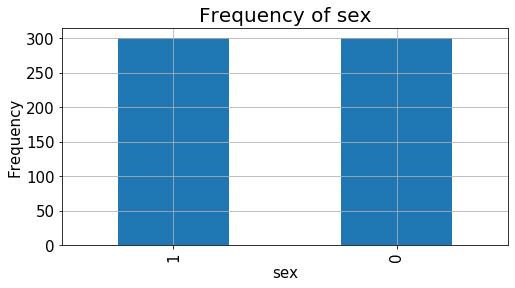

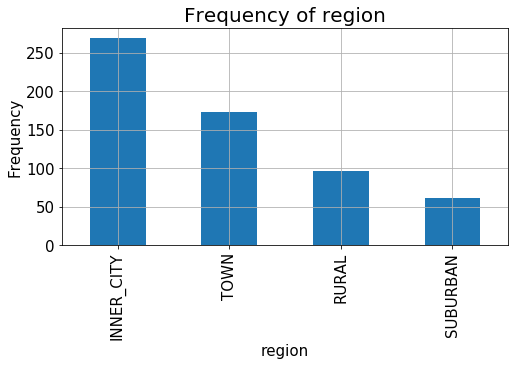

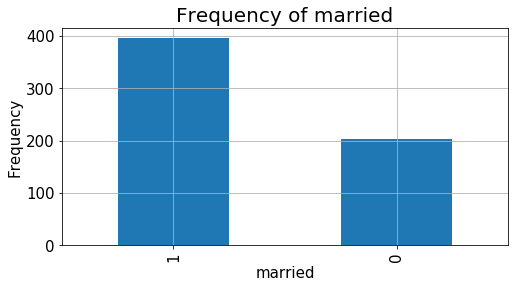

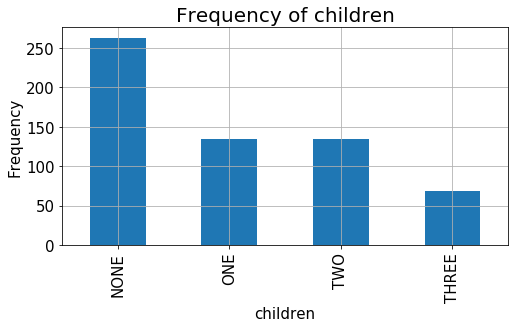

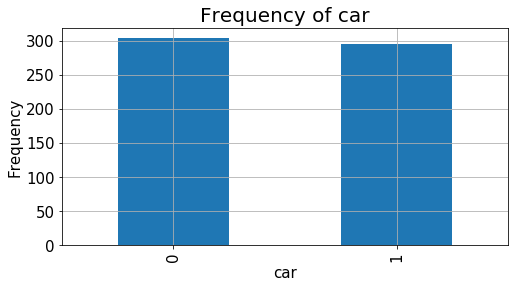

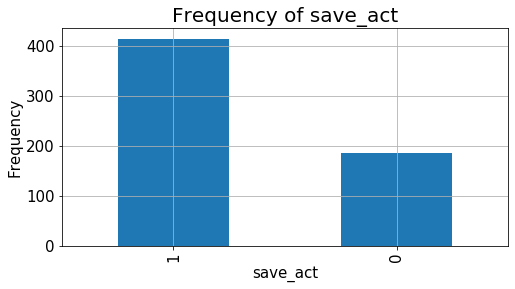

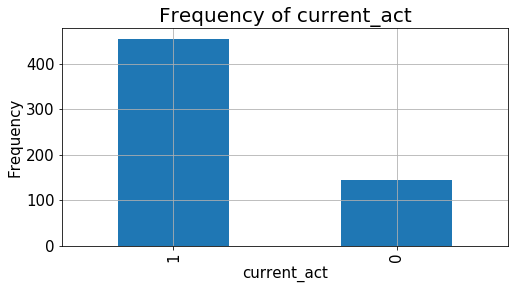

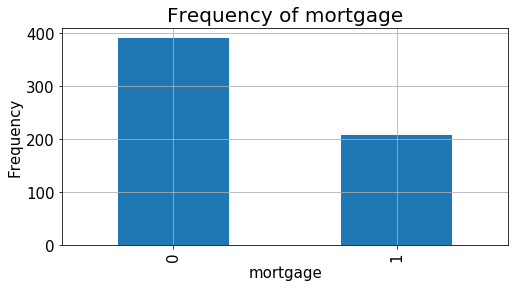

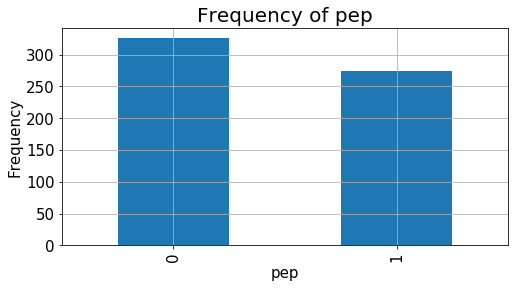

In [12]:
for i in categorical:
    df[i].value_counts().plot(kind='bar',figsize = (8,4))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title('Frequency of ' + i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

In [13]:
df['pep'].value_counts()

0    326
1    274
Name: pep, dtype: int64

As it is possible to see from the plot above and the numbers for the target variable: `pep` the two possible options are pretty similar in quantity, therefore no class imbalance correction is needed (at least no for this assignment)

### Numerical Variables

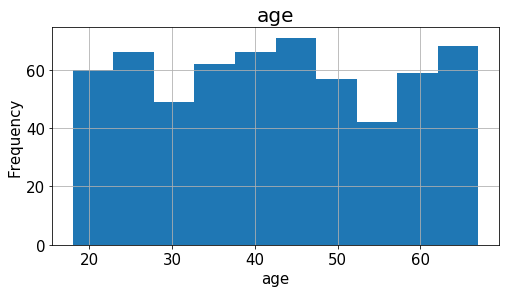

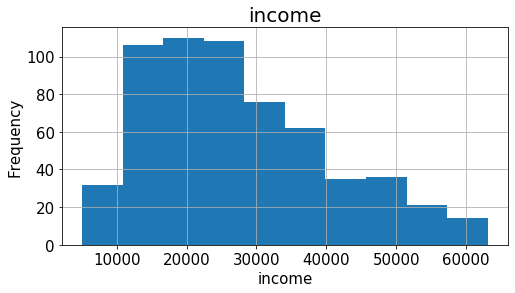

In [14]:
numerical = ['age','income']
for i in numerical:
    df[i].hist(figsize = (8,4))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title(i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

From the plots above we can see that some variables need to be change to binary numerical values, and others need to get one hot encoded.

# Analysis

For this assignment and since the goal is to compare **decision trees** and **random forest** and there is not an excessive amount of features, all features are going to be use. Understanding that feature selection is a vital step for this analysis in a real/work situation.

In [15]:
features = my_list.copy()
features.remove('region')
features.remove('children')
features.remove('pep') #target variable
features = features + one_hot

For this analysis the model is going to have the following features:

In [16]:
features

['age',
 'sex',
 'income',
 'married',
 'car',
 'save_act',
 'current_act',
 'mortgage',
 'ONE',
 'THREE',
 'NONE',
 'TWO',
 'INNER_CITY',
 'TOWN',
 'RURAL',
 'SUBURBAN']

## Split Data Set

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [18]:
#Split the data
variables = df[features]
label = df['pep']
X_train, X_test, y_train, y_test = train_test_split(variables, label, test_size=0.30, random_state=42)

## Hyperparameter Settings

Based on the documentation available there are many hyper-parameters that can be modify for these 2 ML Models (decision trees and random forest) but for simplicity just some of them are going to be explore:

### Choosing the best hyperparameters for the `decision tree` model

In [19]:
max_depth_options = [2,3,4,5,6,7,8,9,10]
min_sample_options = [2,3,4,5,6,7,8,9,10]
model_criterion = ['entropy', 'gini']
min_samples_leaf_options = [2,3,4,5,6,7,8,9,10]

dt_grid = {'criterion': model_criterion, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

dt_base = DecisionTreeClassifier()

decision_trees_hyper = RandomizedSearchCV(estimator = dt_base, param_distributions = dt_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
decision_trees_hyper.fit(X_train, y_train)

x = decision_trees_hyper.best_params_
x

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'criterion': 'entropy'}

### Choosing the best hyperparameters for the `random forest` model

In [20]:
n_estimators_options = [10,20,30,40,50,60,70,80,90,100]

rf_grid = {'criterion': model_criterion,
           'n_estimators':n_estimators_options, 
           'max_depth': max_depth_options,
           'min_samples_split':min_sample_options,
           'min_samples_leaf':min_samples_leaf_options}

rf_base = RandomForestClassifier()

random_forest_hyper = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
random_forest_hyper.fit(X_train, y_train)

y = random_forest_hyper.best_params_
y

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 70,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini'}

## Comparison between Models

In [21]:
# Decision Tree
dt_comparison = DecisionTreeClassifier(criterion=x['criterion'], max_depth = x['max_depth'], min_samples_split = x['min_samples_split'], min_samples_leaf = x['min_samples_leaf']).fit(X_train, y_train) 
y_dt_pred = dt_comparison.predict(X_test)

# Random Forest
rf_comparison = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf']).fit(X_train, y_train)
y_rf_pred = rf_comparison.predict(X_test)

In [22]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Decision Tree accuracy: {}%".format(accuracy_score(y_test, y_dt_pred)*100))
print("Random Forest accuracy: {}%".format(accuracy_score(y_test, y_rf_pred)*100))

Decision Tree accuracy: 82.22222222222221%
Random Forest accuracy: 87.22222222222223%


### Visualize Confusion Matrix

**Decision Tree Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_dt_pred),
    columns=['Predicted Yes', 'Predicted No'],
    index=['True Yes', 'True No'],
)

,Predicted Yes,Predicted No
True Yes,83,10
True No,22,65


**Random Forest Confusion Matrix**

In [24]:
pd.DataFrame(
    confusion_matrix(y_test, y_rf_pred),
    columns=['Predicted Yes', 'Predicted No'],
    index=['True Yes', 'True No'],
)

,Predicted Yes,Predicted No
True Yes,84,9
True No,14,73


### Visualization of the Trees

**Decision Tree**

[Text(1835.296875, 2548.125, 'ONE <= 0.5\nentropy = 0.991\nsamples = 420\nvalue = [233, 187]\nclass = age'),
 Text(1403.71875, 2208.375, 'income <= 51388.451\nentropy = 0.924\nsamples = 327\nvalue = [216, 111]\nclass = age'),
 Text(993.9375, 1868.625, 'married <= 0.5\nentropy = 0.89\nsamples = 309\nvalue = [214, 95]\nclass = age'),
 Text(383.625, 1528.875, 'NONE <= 0.5\nentropy = 0.995\nsamples = 94\nvalue = [51, 43]\nclass = age'),
 Text(209.25, 1189.125, 'income <= 38898.051\nentropy = 0.773\nsamples = 44\nvalue = [34, 10]\nclass = age'),
 Text(139.5, 849.375, 'age <= 28.5\nentropy = 0.552\nsamples = 39\nvalue = [34, 5]\nclass = age'),
 Text(69.75, 509.625, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = age'),
 Text(209.25, 509.625, 'current_act <= 0.5\nentropy = 0.755\nsamples = 23\nvalue = [18, 5]\nclass = age'),
 Text(139.5, 169.875, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = age'),
 Text(279.0, 169.875, 'entropy = 0.874\nsamples = 17\nvalue = [12, 5]\nclass = ag

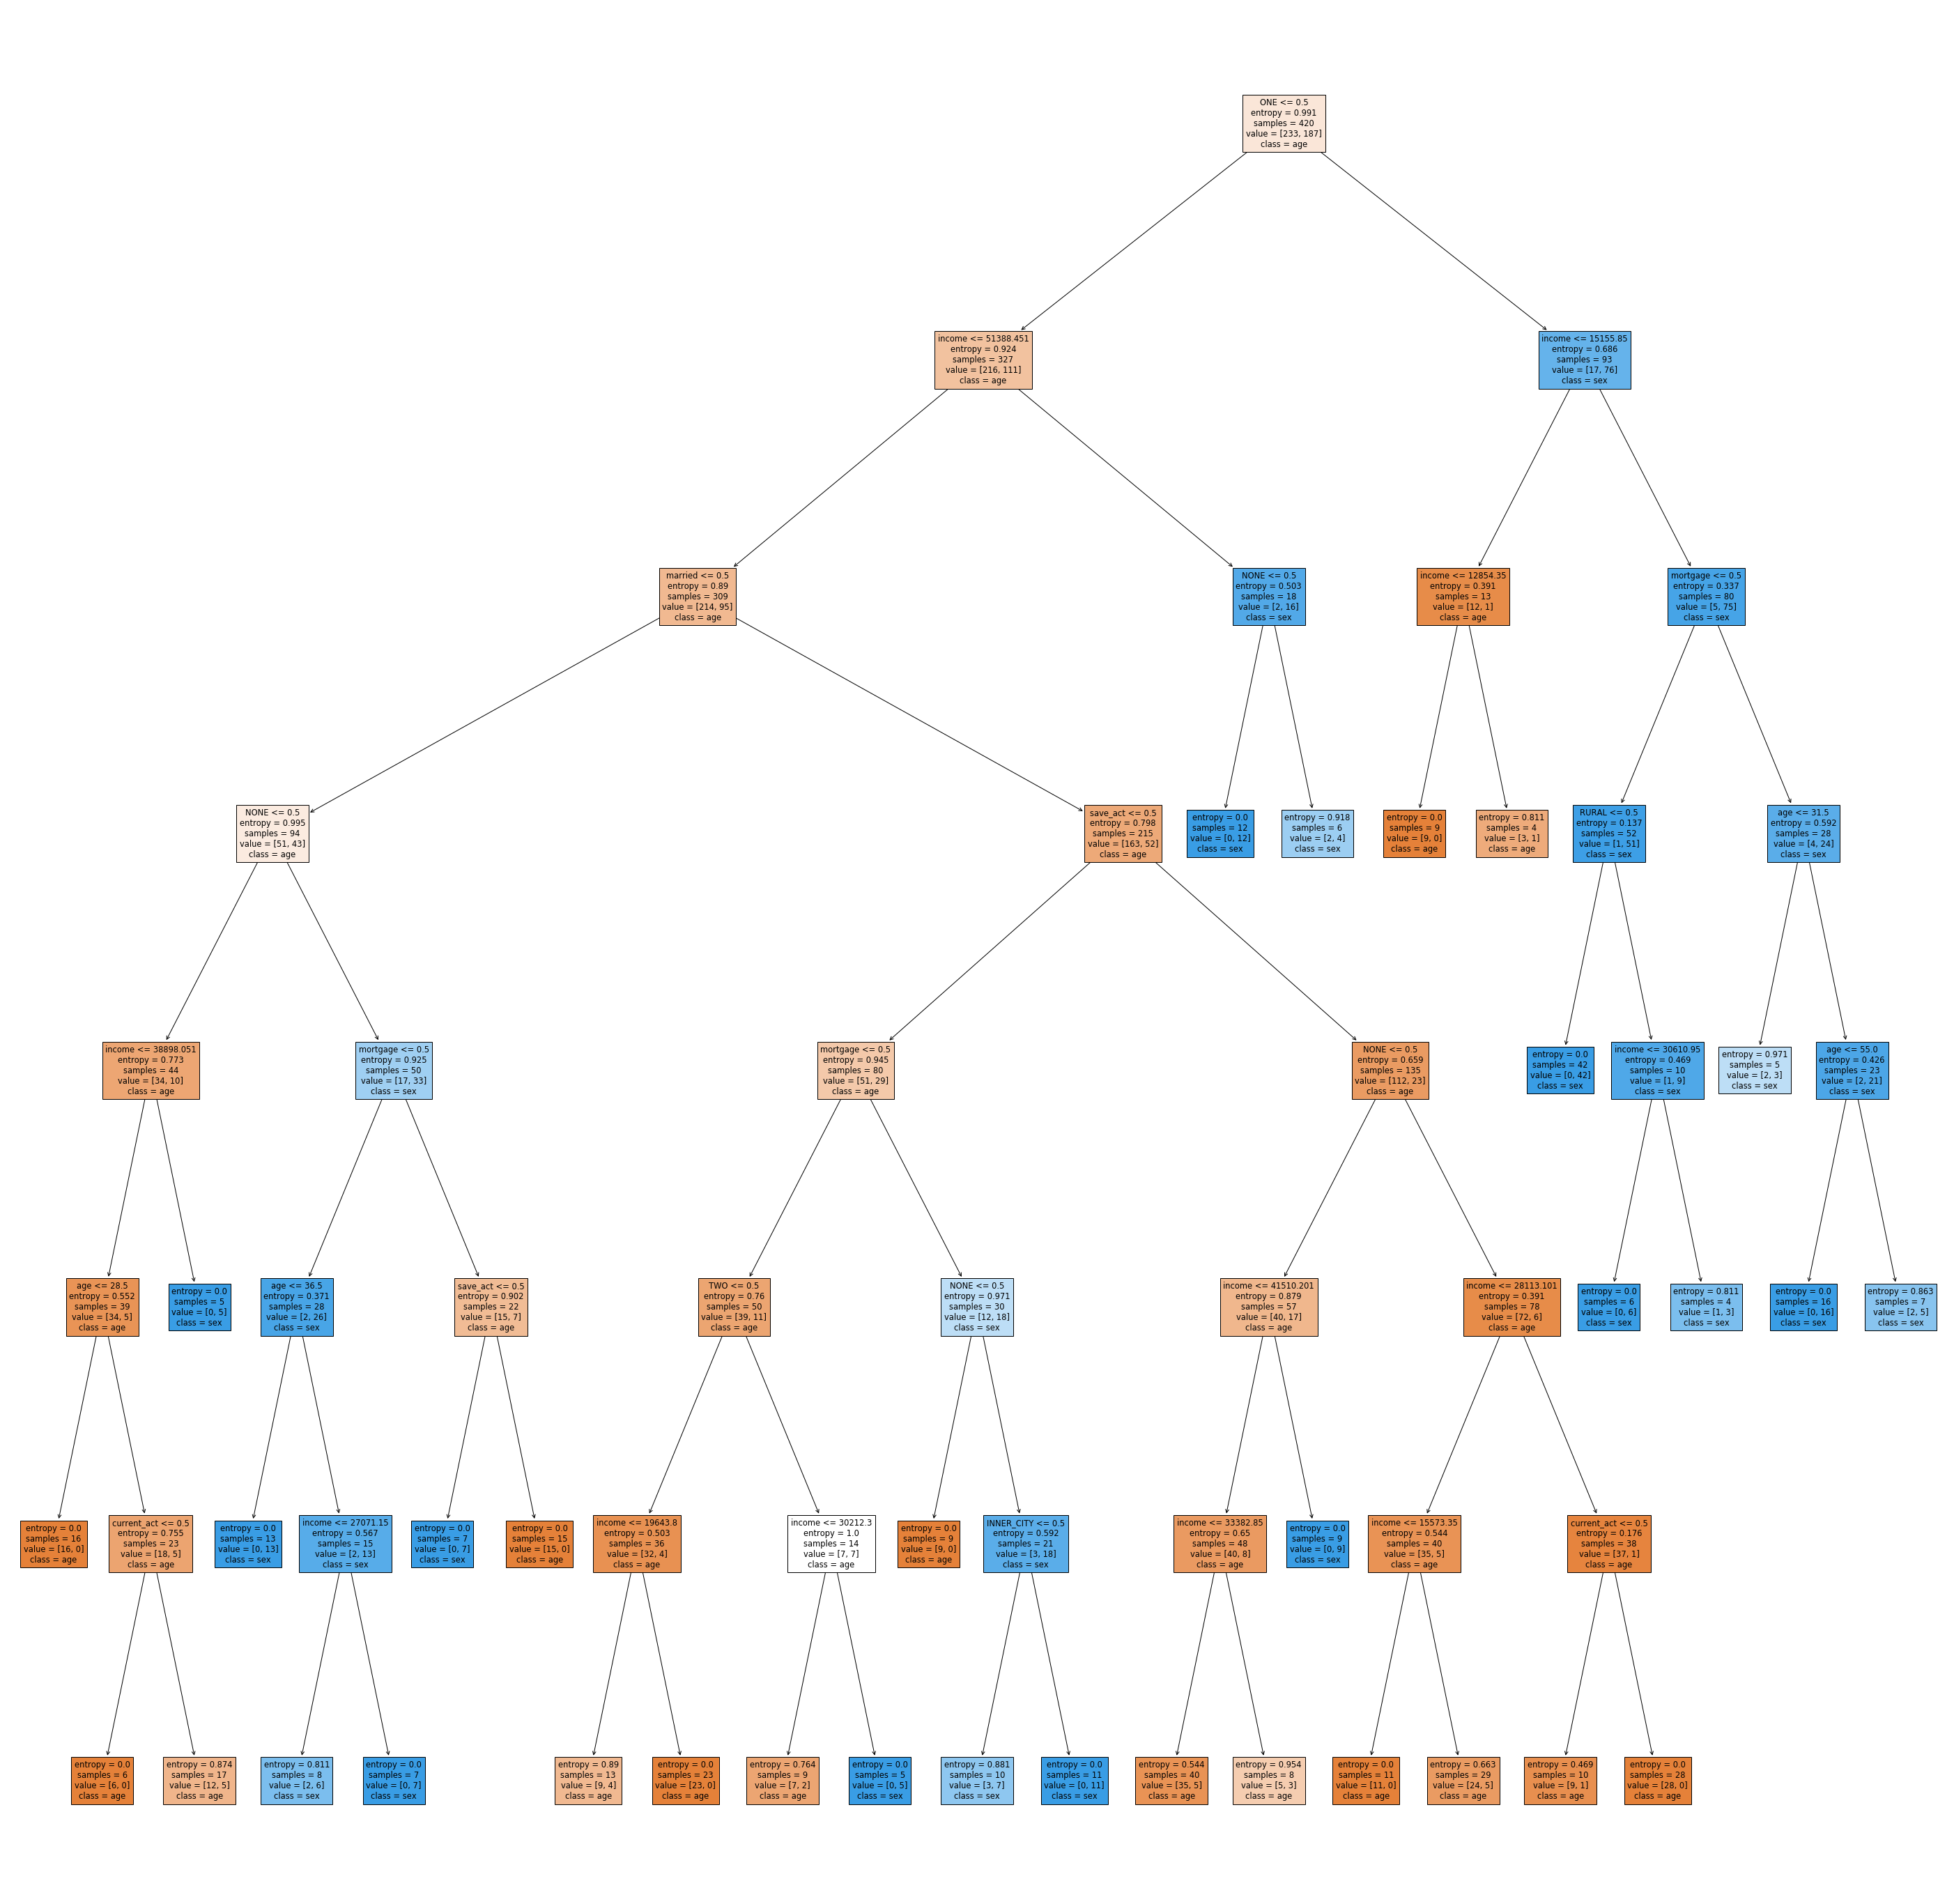

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(30,30)) 
tree.plot_tree(dt_comparison,
                   feature_names=features,  
                   class_names=features,
                   filled=True)

**Random Forest**

In this case the last Decision Tree is printed to take a look at some of the splits.

[Text(1820.2614795918366, 2594.4545454545455, 'THREE <= 0.5\ngini = 0.483\nsamples = 268\nvalue = [249, 171]\nclass = age'),
 Text(1021.3392857142857, 2347.3636363636365, 'married <= 0.5\ngini = 0.494\nsamples = 238\nvalue = [208, 166]\nclass = age'),
 Text(341.63265306122446, 2100.272727272727, 'save_act <= 0.5\ngini = 0.457\nsamples = 68\nvalue = [41, 75]\nclass = sex'),
 Text(170.81632653061223, 1853.181818181818, 'TOWN <= 0.5\ngini = 0.266\nsamples = 19\nvalue = [6, 32]\nclass = sex'),
 Text(113.87755102040816, 1606.090909090909, 'current_act <= 0.5\ngini = 0.386\nsamples = 12\nvalue = [6, 17]\nclass = sex'),
 Text(56.93877551020408, 1359.0, 'gini = 0.48\nsamples = 2\nvalue = [3, 2]\nclass = age'),
 Text(170.81632653061223, 1359.0, 'income <= 15165.65\ngini = 0.278\nsamples = 10\nvalue = [3, 15]\nclass = sex'),
 Text(113.87755102040816, 1111.909090909091, 'gini = 0.0\nsamples = 3\nvalue = [0, 7]\nclass = sex'),
 Text(227.75510204081633, 1111.909090909091, 'ONE <= 0.5\ngini = 0.397\

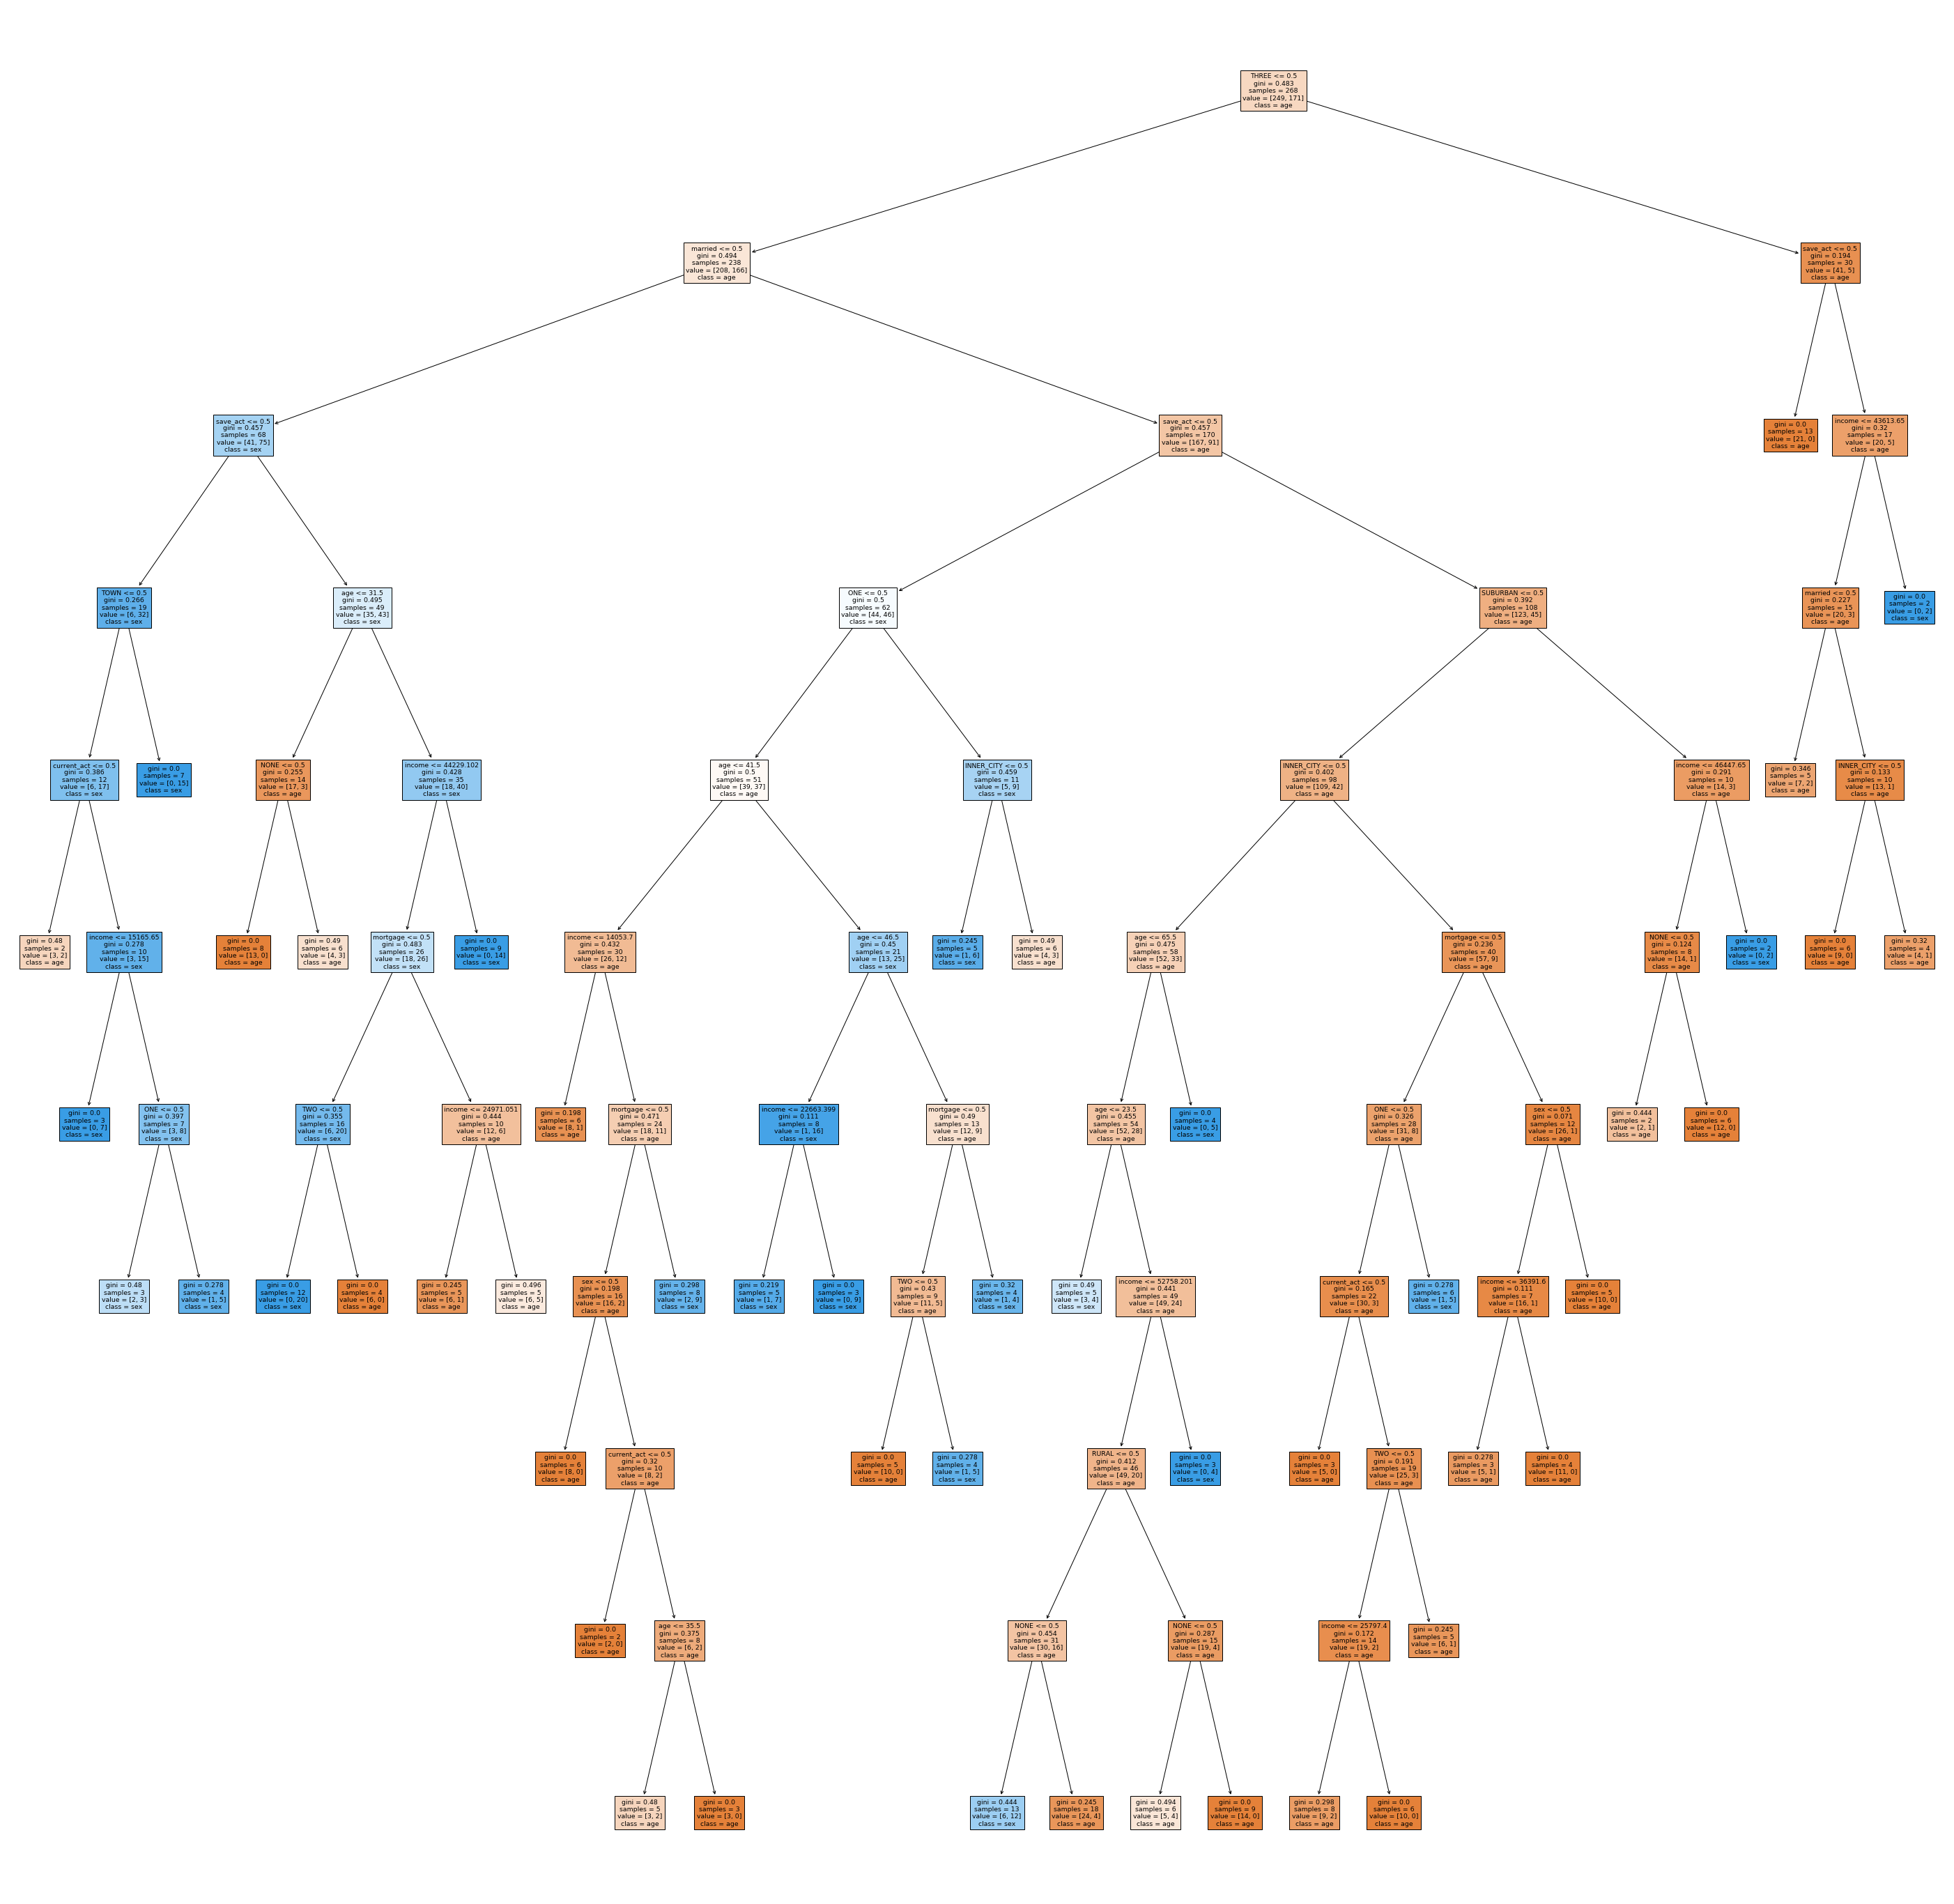

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(50,50)) 
tree.plot_tree(rf_comparison[-1],
                   feature_names=features,  
                   class_names=features,
                   filled=True)

## Performance Comparison

In [33]:
from sklearn.metrics import *
def ROM_plots(T,y):
    # ROC analysis
    LW = 2.0 # line width for plots
    LL = "lower right" # legend location
    LC = 'orange' # Line Color
    fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    #print ("\nTP rates:", np.round(tpr, 2))
    #print ("\nFP rates:", np.round(fpr, 2))
    #print ("\nProbability thresholds:", np.round(th, 2))
    plt.figure()
    plt.title('Receiver Operating Characteristic curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPT')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
    plt.legend(loc=LL)
    plt.show()
    print ("\nAUC score (using auc function):", np.round(AUC, 2))
    #print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")

#Function to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("\n\n#############\Classifier: #############\n", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        ROM_plots(T,y)
    
    names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
    list_of_values = [accuracy_rate, error_rate, precision, recall, f1_score]
    colors = ['lightseagreen', 'tomato', 'darkmagenta', 'crimson', 'olive']
    
    #Plots of each of the Performance Values for each of the Classifiers in this analysis
    for i in range(len(names)):
        plt.bar(header, list_of_values[i], color=colors[i])
        plt.xticks(rotation=45)
        plt.title(names[i])
        plt.ylabel("Score")
        plt.show()

In [31]:
#Classifiers
dt = DecisionTreeClassifier(criterion=x['criterion'], max_depth = x['max_depth'], min_samples_split = x['min_samples_split'], min_samples_leaf = x['min_samples_leaf'])
rf = RandomForestClassifier(n_estimators = y['n_estimators'], criterion = y['criterion'], max_depth = y['max_depth'], min_samples_split = y['min_samples_split'], min_samples_leaf = y['min_samples_leaf'])

#List for Classifiers and Names
header = ["Decision_Tree","Random_Forest"]
V = [dt, rf]



#############\Classifier: #############
 Decision_Tree

Accuracy: 0.8222 ,Error Rate: 0.1778 ,Precision: 0.7905 ,Recall: 0.8925 ,F1 Score: 0.8384


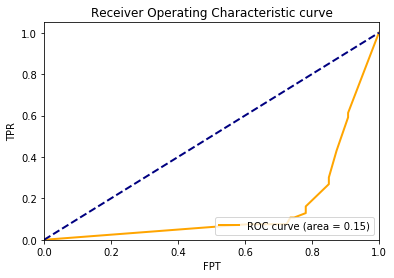


AUC score (using auc function): 0.15


#############\Classifier: #############
 Random_Forest

Accuracy: 0.85 ,Error Rate: 0.15 ,Precision: 0.83 ,Recall: 0.8925 ,F1 Score: 0.8601


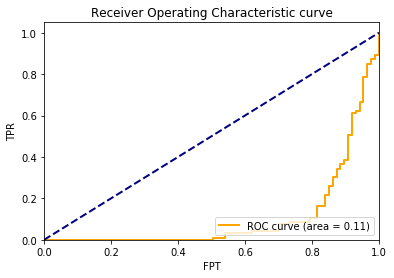


AUC score (using auc function): 0.11


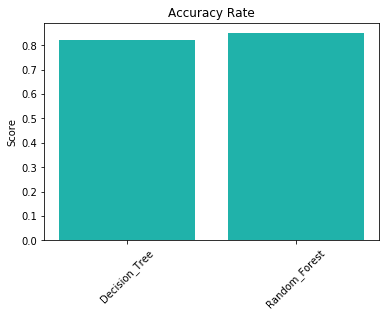

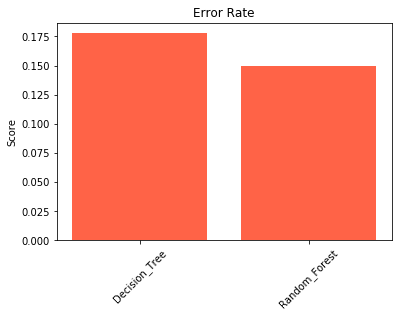

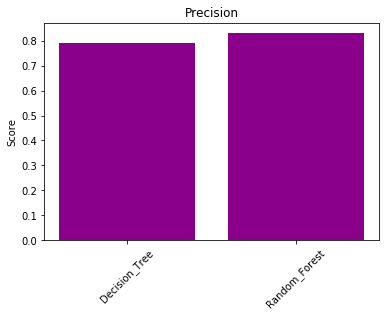

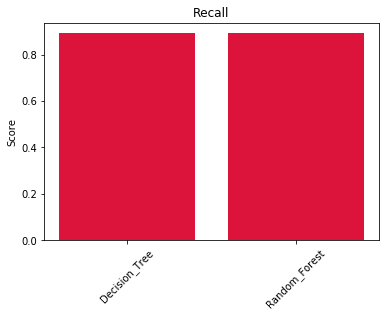

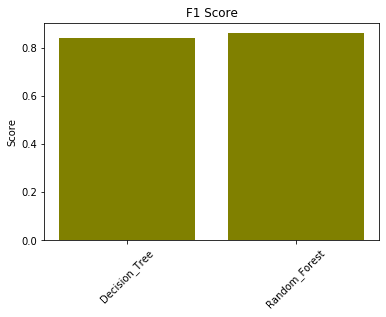

In [34]:
#Running and obtaining performance values from the Models listed above
classifier_performance(V, header, X_train, X_test, y_train, y_test)

From the comparison plots above it is possible to see that the `random forest` model does better than the `decision tree` model almost in all the performance values, except for the AUC for in which the `decision_tree` model got a better value. Now the values are so low that it is likely an issue with the model rather than an actual difference.

# Summary/Conclusions.